Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.5e+04  |
|    ep_rew_mean      | -249     |
|    exploration_rate | 0.005    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 26       |
|    time_elapsed     | 954      |
|    total_timesteps  | 25000    |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 3.51     |
|    n_updates        | 24999    |
----------------------------------


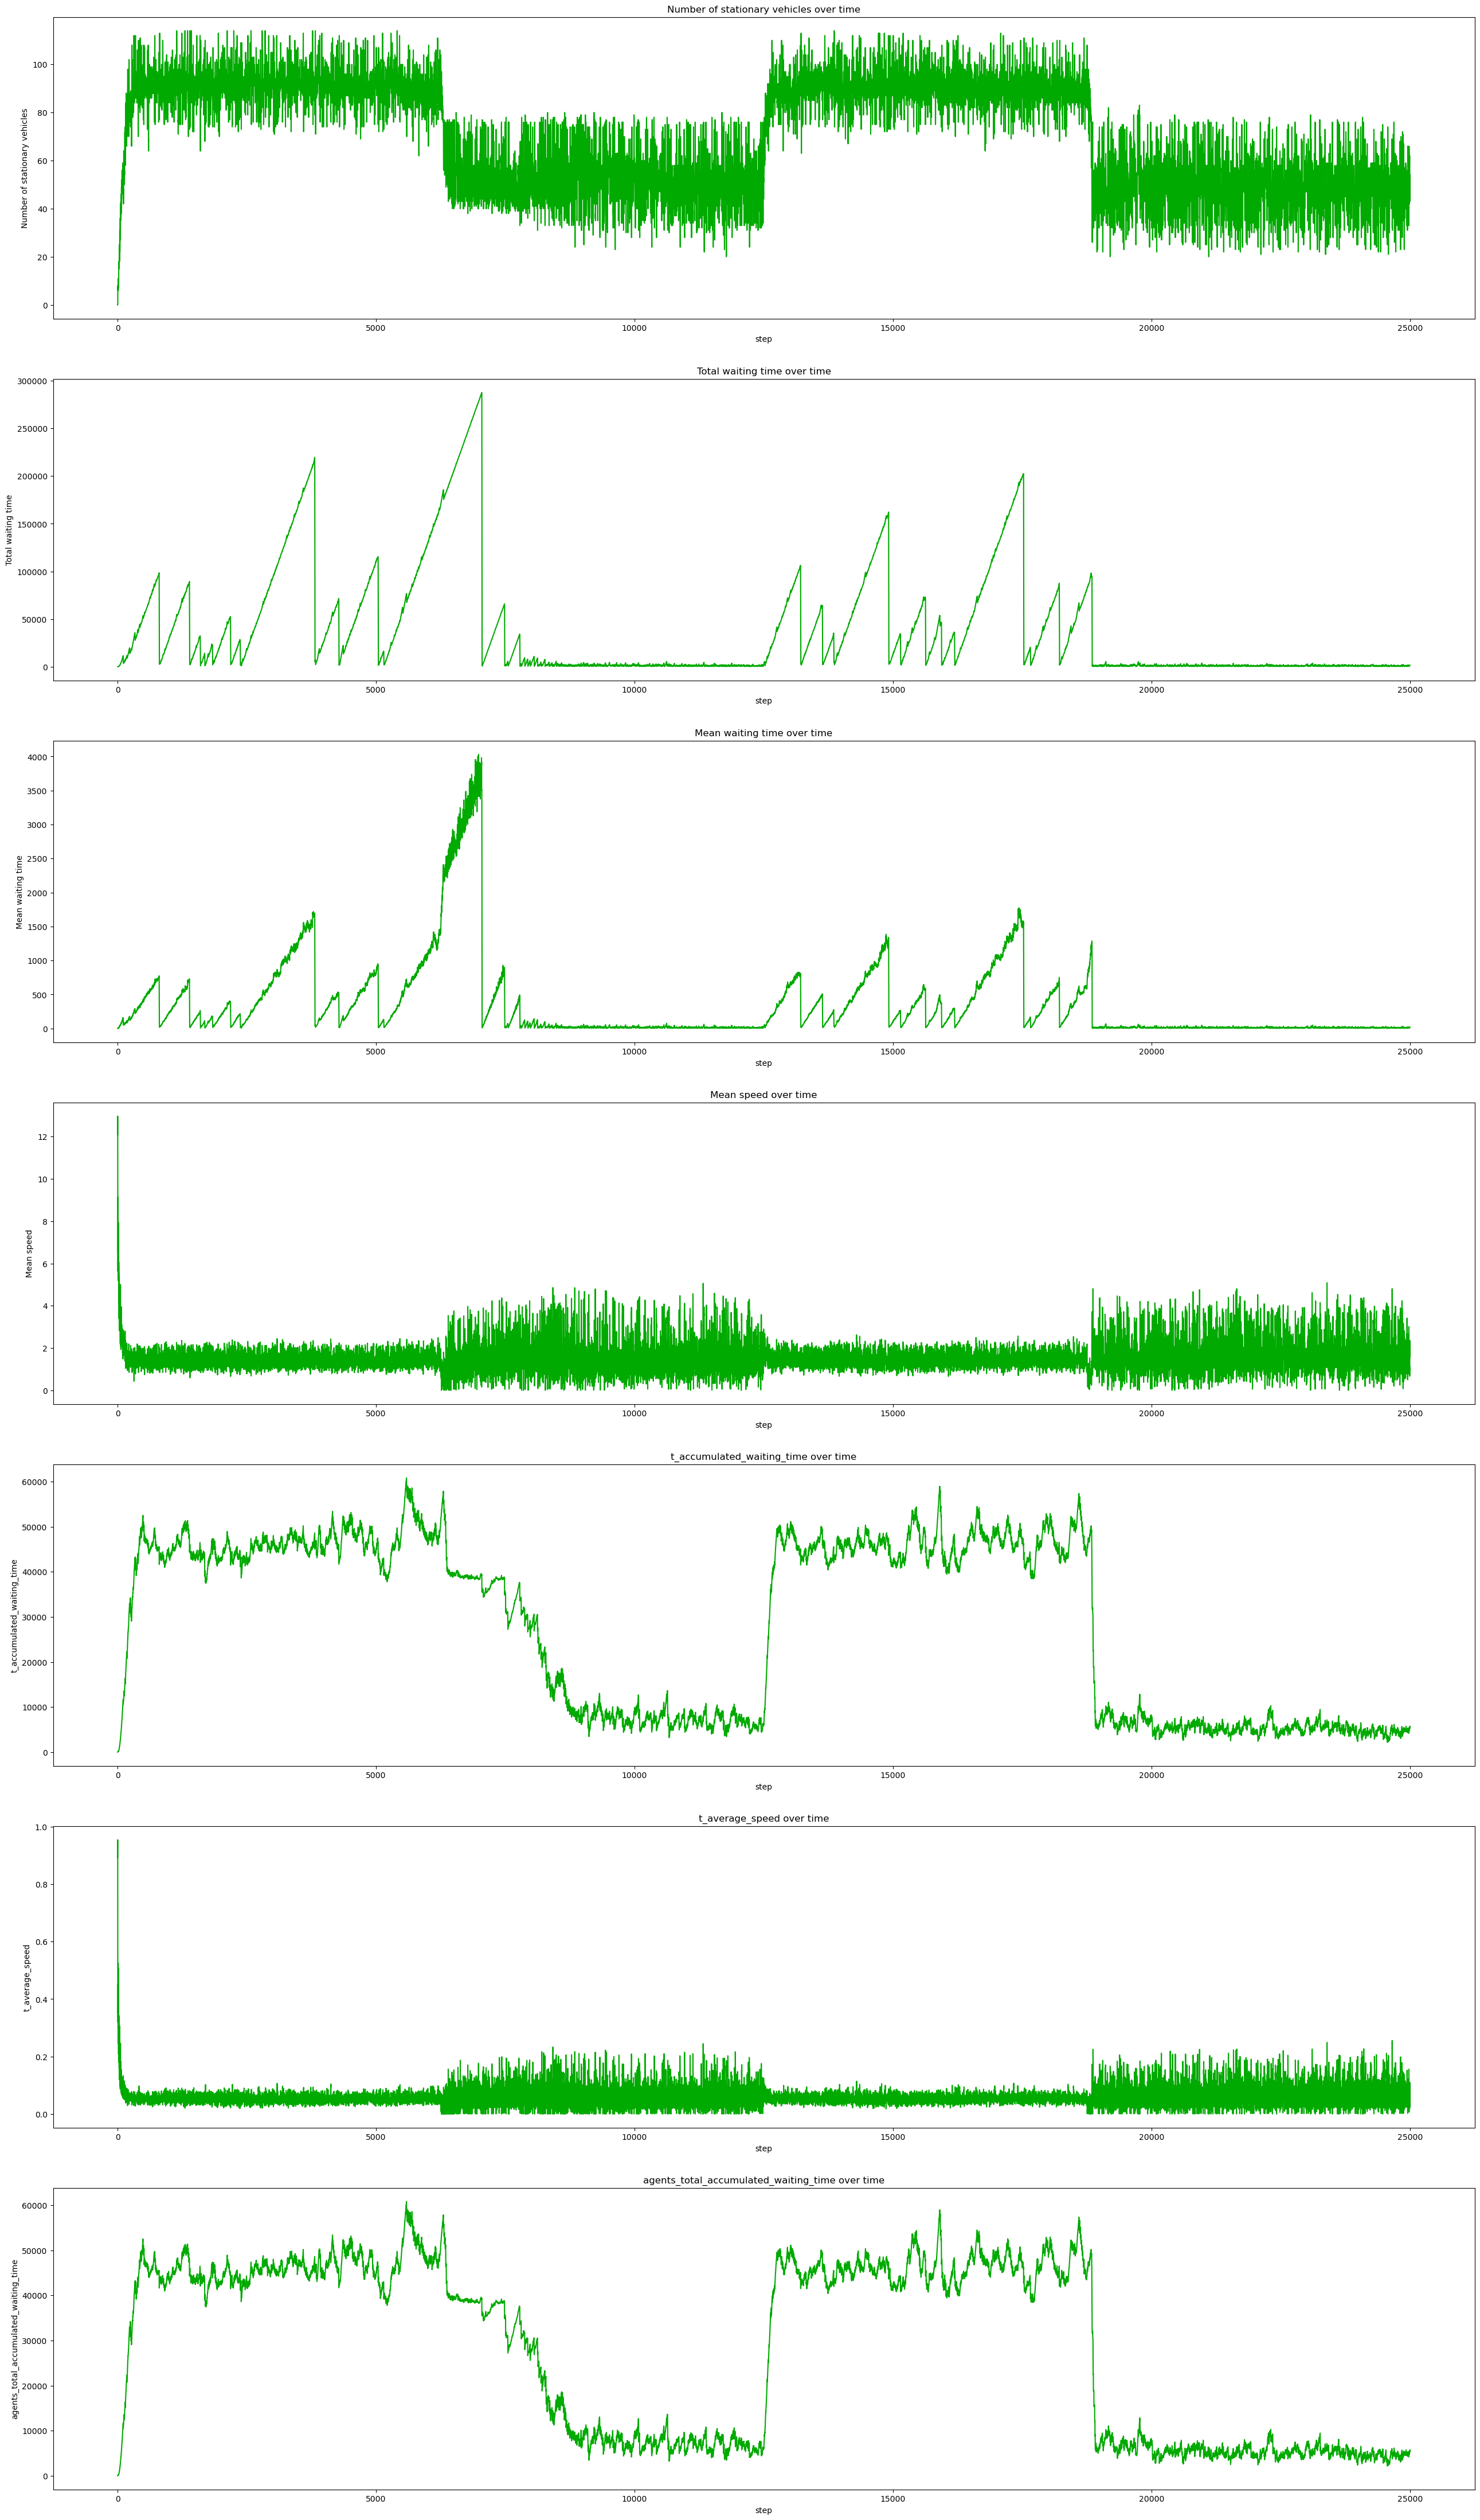

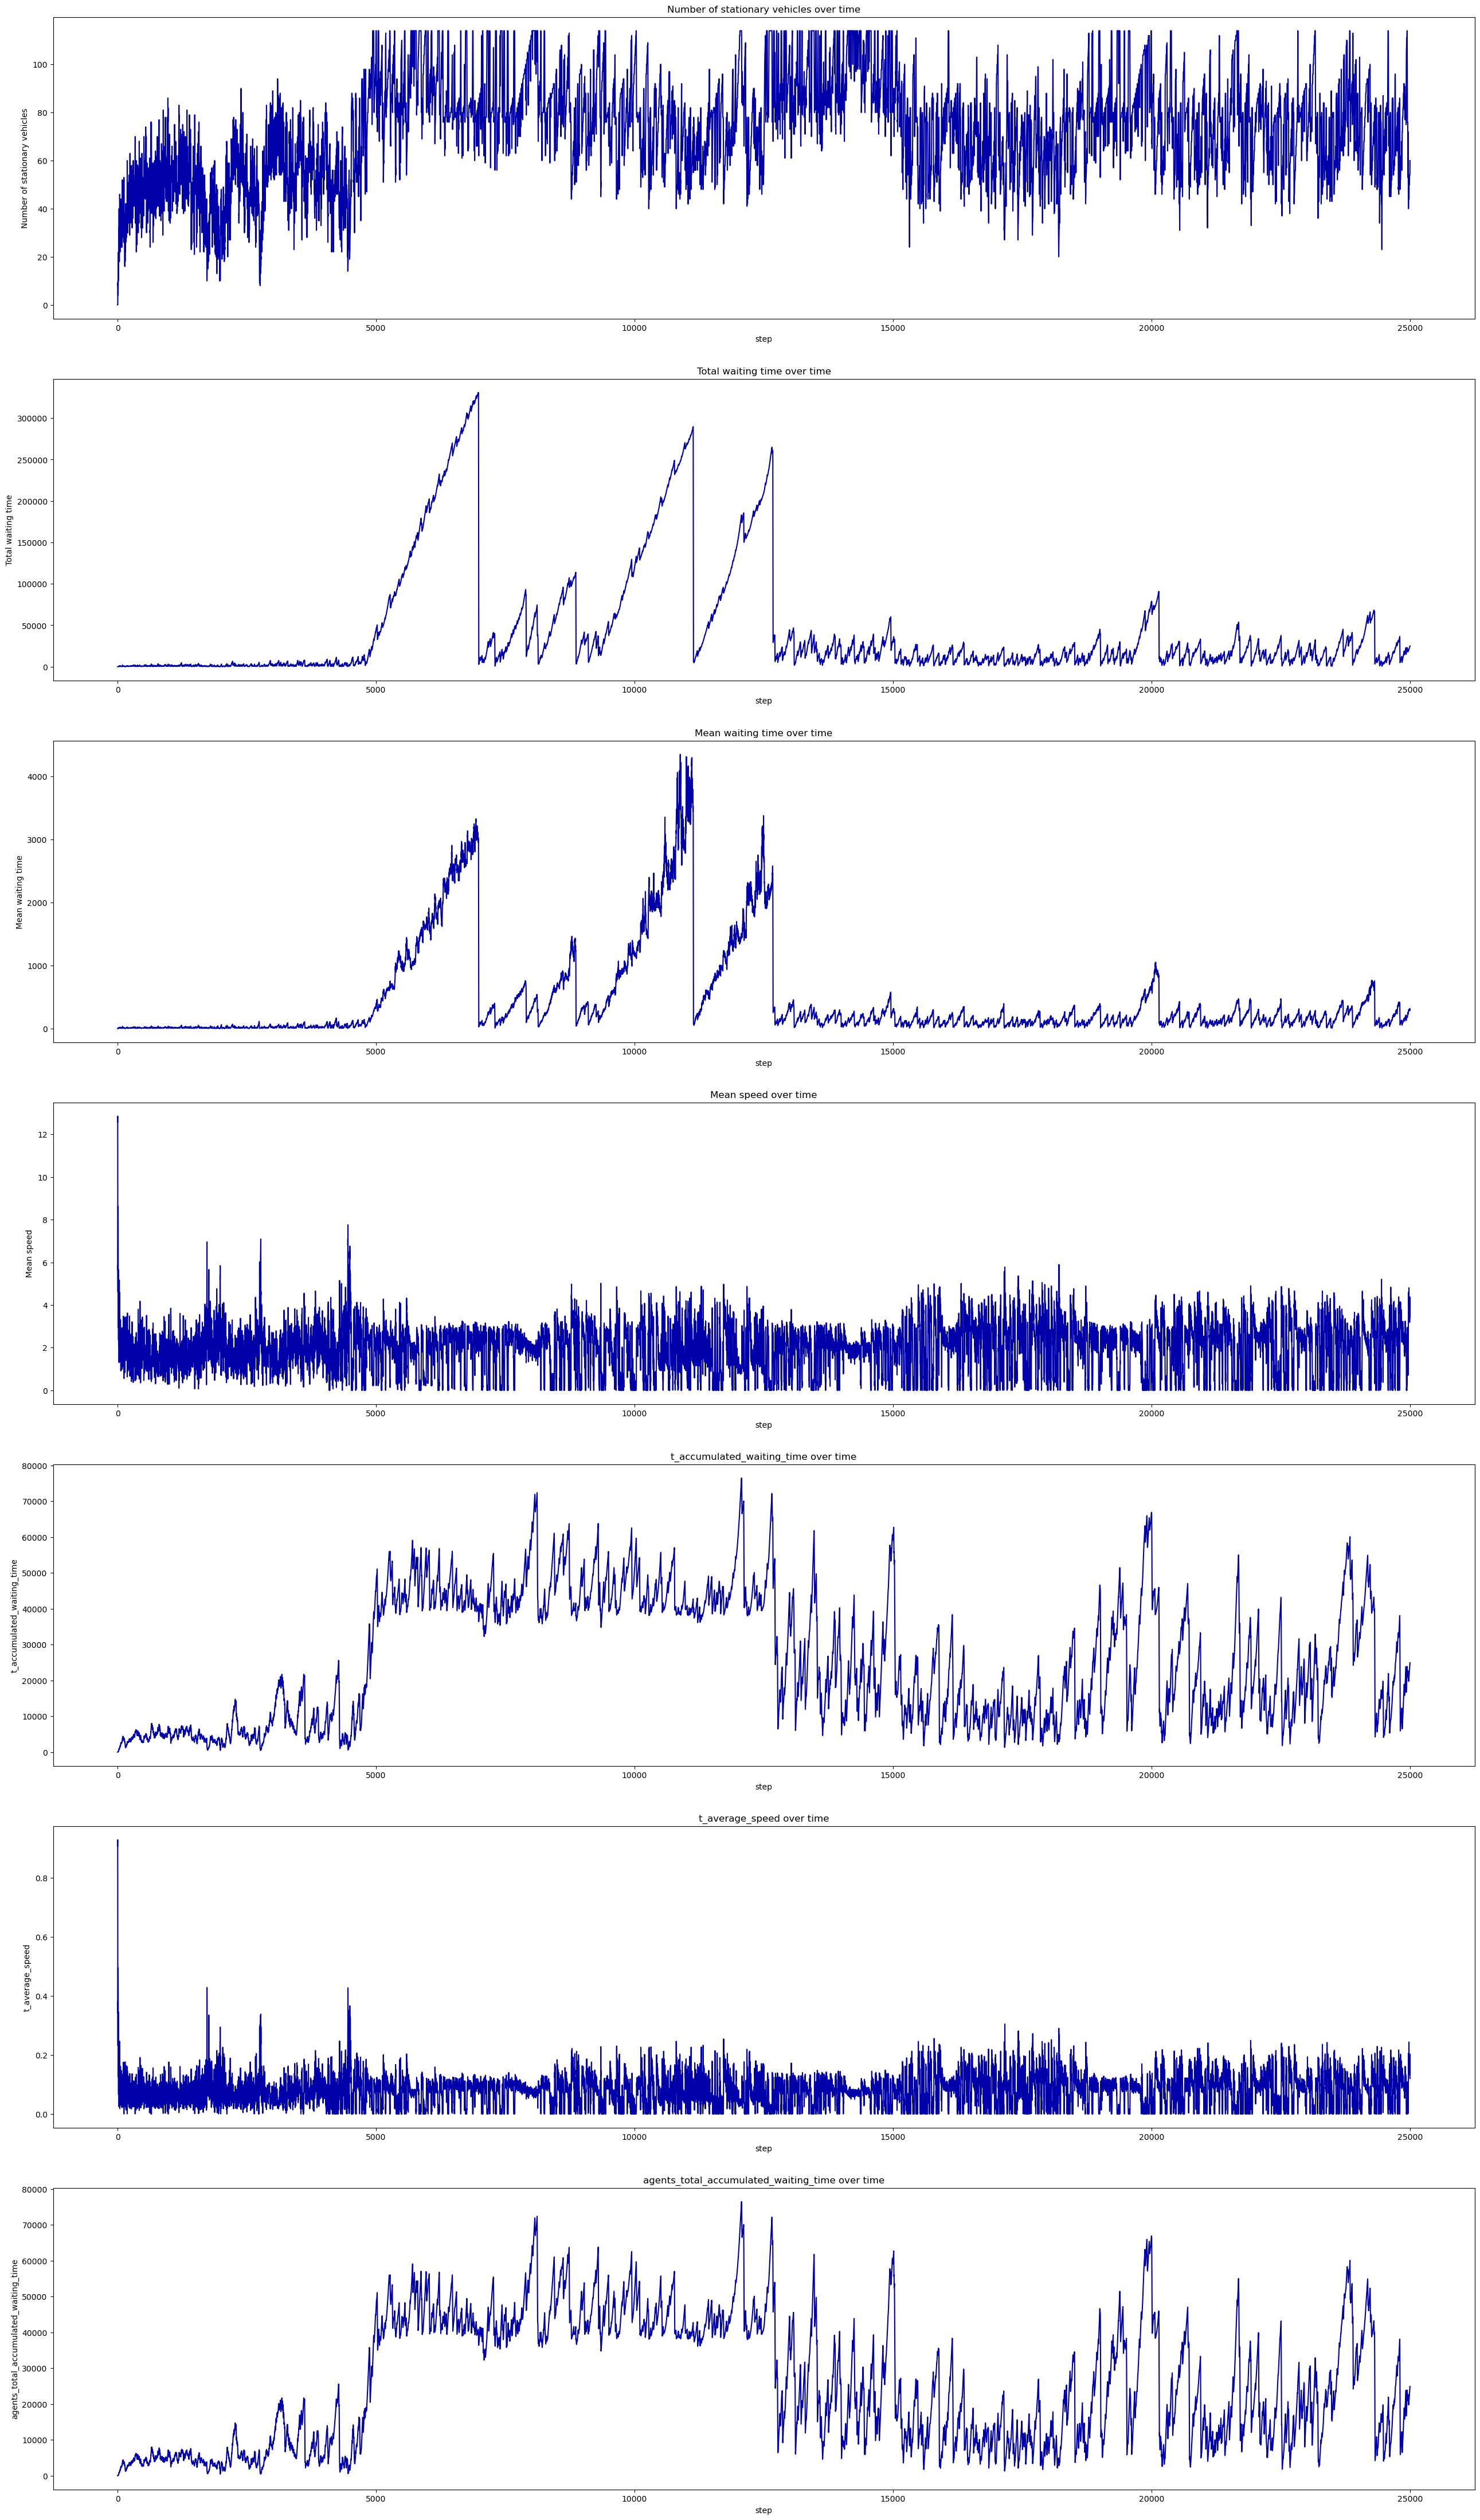

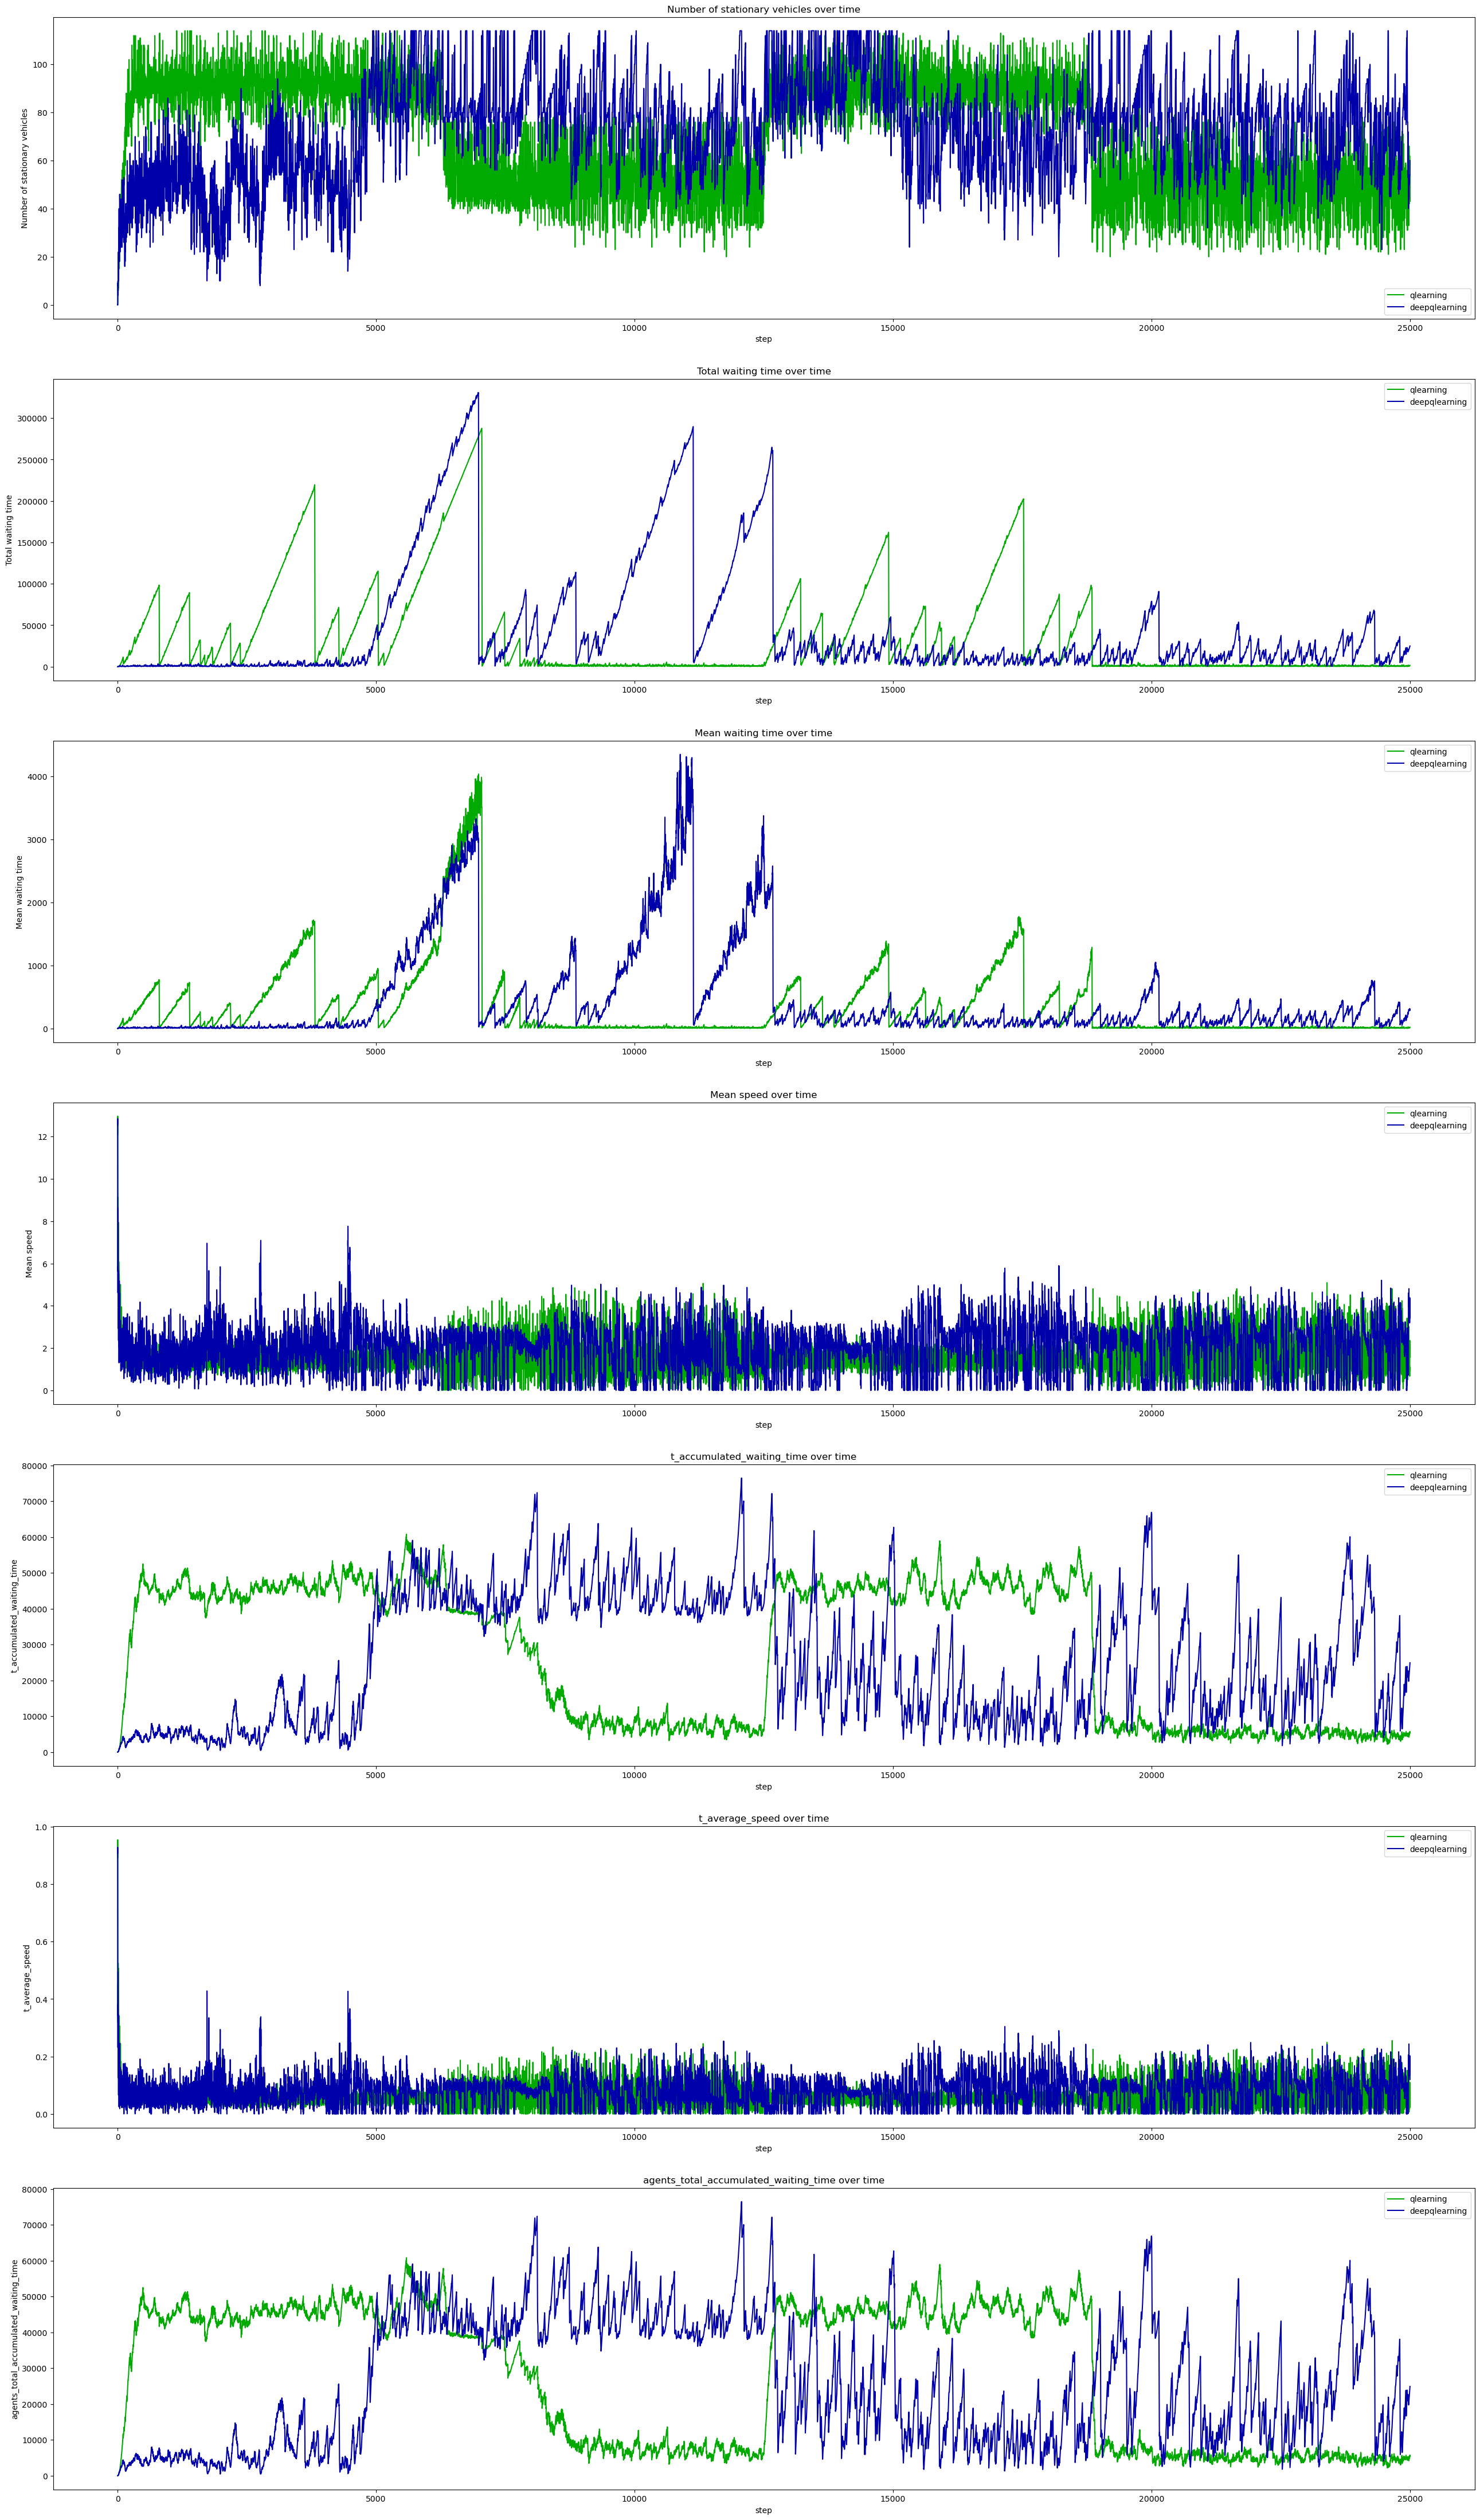

In [1]:
%matplotlib inline
from traffic.agent import TrafficAgent, FixedCycleTrafficAgent, QLearningTrafficAgent, DeepQLearningTrafficAgent
from traffic.environment import TrafficEnvironment
from utils.plotter import MultiPlotter, PlotData
from warnings import filterwarnings

filterwarnings('ignore')

plot_data = PlotData(
  [
    'system_total_stopped',
    'system_total_waiting_time',
    'system_mean_waiting_time',
    'system_mean_speed',
    't_accumulated_waiting_time',
    't_average_speed',
    'agents_total_accumulated_waiting_time'
  ],
  1,
  100
)

traffic_env = TrafficEnvironment(
  net = 'nets/2way-single-intersection/single-intersection.net.xml',
  rou = 'nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
  seconds = 100000,
  delta_time = 4,
  yellow_time = 3,
  min_green = 5,
  max_green = 30
)

agents: dict[str, TrafficAgent] = {
  # 'fixedcycle': FixedCycleTrafficAgent(
  #   'fixedcycle',
  #   '#aa0000',
  #   traffic_env,
  #   plot_data
  # ),
  'qlearning': QLearningTrafficAgent(
    'qlearning',
    '#00aa00',
    traffic_env,
    alpha = 0.1,
    gamma = 0.99,
    init_eps = 1,
    min_eps = 0.005,
    decay = 0.9,
    plot_data = plot_data
  ),
  'deepqlearning': DeepQLearningTrafficAgent(
    'deepqlearning',
    '#0000aa',
    traffic_env,
    alpha = 0.1,
    gamma = 0.99,
    init_eps = 1,
    min_eps = 0.005,
    decay_time = 0.2,
    plot_data = plot_data
  )
}

multi_plotter = MultiPlotter(list(map(lambda agent: {'name': agent.name, 'color': agent.color}, list(agents.values()))), plot_data)

for agent in agents:
  agents[agent].run(multi_plotter.append, use_gui = False)

# agents['fixedcycle'].run(multi_plotter.append, load_path = '')
# agents['qlearning'].run(multi_plotter.append, load_path = 'outputs/qlearning/saves/')
# agents['deepqlearning'].run(multi_plotter.append, load_path = 'outputs/deepqlearning/saves/')

multi_plotter.save()